In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random,os

In [4]:
# load the dataset
from tensorflow.keras.datasets import fashion_mnist

os.chdir(r"E:\projects\classification similarity using Siamese-Network\dataset")
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

print("train-image:{} , train-labels:{}".format(train_images.shape,train_labels.shape))
print("test-image:{} , test-labels:{}".format(test_images.shape,test_labels.shape))

train-image:(60000, 28, 28) , train-labels:(60000,)
test-image:(10000, 28, 28) , test-labels:(10000,)


In [5]:
## Image pre-processing
train_images,test_images=train_images.astype('float32'),test_images.astype('float32')  # to float
train_images,test_images=train_images/255.0,test_images/255.0                          # normalize values

In [6]:
## create paired dataset

def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
            
    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):
    
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    
    return pairs, y


# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

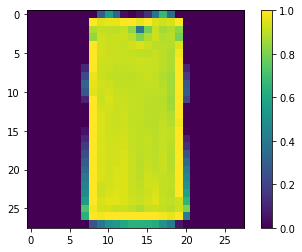

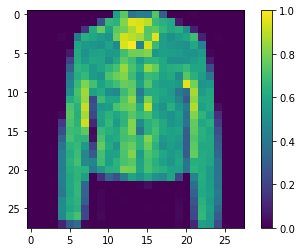

0.0


In [9]:
def show_image(image):
    """ Visualization image of specified indexed-image """
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()


## Visualize paired-data
pair = 3
show_image(ts_pairs[pair][0])
show_image(ts_pairs[pair][1])
print("Label: ",ts_y[pair])

In [10]:
print(tr_pairs.shape,tr_y.shape)
print(ts_pairs.shape,ts_y.shape)

## Save paired data
np.save(r"E:\projects\classification similarity using Siamese-Network\dataset\train_img.npy",tr_pairs)
np.save(r"E:\projects\classification similarity using Siamese-Network\dataset\train_label.npy",tr_y)
np.save(r"E:\projects\classification similarity using Siamese-Network\dataset\test_img.npy",tr_pairs)
np.save(r"E:\projects\classification similarity using Siamese-Network\dataset\test_label.npy",tr_y)

(119980, 2, 28, 28) (119980,)
(19980, 2, 28, 28) (19980,)
